# **PREDIZIONE DEL PREZZO DI AUTOMOBILI**




Obiettivo di questo progetto è addestrare e valutare più modelli di regressione per predire il prezzo di vendita di automobili usate.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.cm as cm
from math import nan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError
from keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error



In [ ]:
pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt
from keras_tuner import Hyperband



In [ ]:
path ='/car_prices.csv'
dataset = pd.read_csv(path)
dataset.head()

,manufacturer,model,year,transmission,mileage,fuelType,mpg,engineSize,price
0,Audi,A1,2017,Manual,15735,Petrol,55.4,1.4,12500
1,Audi,A6,2016,Automatic,36203,Diesel,64.2,2.0,16500
2,Audi,A1,2016,Manual,29946,Petrol,55.4,1.4,11000
3,Audi,A4,2017,Automatic,25952,Diesel,67.3,2.0,16800
4,Audi,A3,2019,Manual,1998,Petrol,49.6,1.0,17300


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41306 entries, 0 to 41305
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  41306 non-null  object 
 1   model         41306 non-null  object 
 2   year          41306 non-null  int64  
 3   transmission  41306 non-null  object 
 4   mileage       41306 non-null  int64  
 5   fuelType      41306 non-null  object 
 6   mpg           41306 non-null  float64
 7   engineSize    41306 non-null  float64
 8   price         41306 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 2.8+ MB


In [ ]:
dataset.describe()

,year,mileage,mpg,engineSize,price
count,41306.000000,41306.000000,41306.000000,41306.000000,41306.000000
mean,2017.099622,23766.754733,55.634063,1.962366,21734.069651
std,2.247246,22627.617263,20.721036,0.602423,11738.947127
min,1970.000000,1.000000,1.100000,0.000000,650.000000
25%,2016.000000,6215.500000,45.600000,1.500000,13900.000000
50%,2017.000000,17467.500000,54.300000,2.000000,19750.000000
75%,2019.000000,34221.250000,64.200000,2.100000,26888.000000
max,2020.000000,323000.000000,470.800000,6.600000,159999.000000


# VISUALIZZAZIONE DEI DATI

**Visualizzazione delle variabili numeriche**


*   Anno di produzione



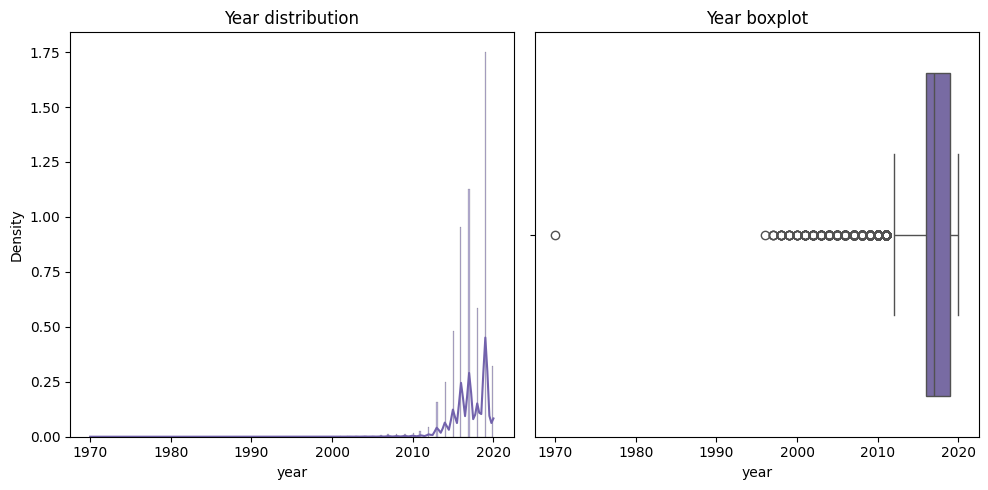

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Primo grafico: istogramma dei dati degli anni
sns.histplot(dataset['year'], kde=True, stat='density', ax=axes[0],color=cm.Purples(0.7))
axes[0].set_title('Year distribution')

# Secondo grafico: boxplot degli anni
sns.boxplot(x=dataset['year'], ax=axes[1],color=cm.Purples(0.7))
axes[1].set_title('Year boxplot')

plt.tight_layout()
plt.show()


*   Consumo stimato (miglia per gallone)



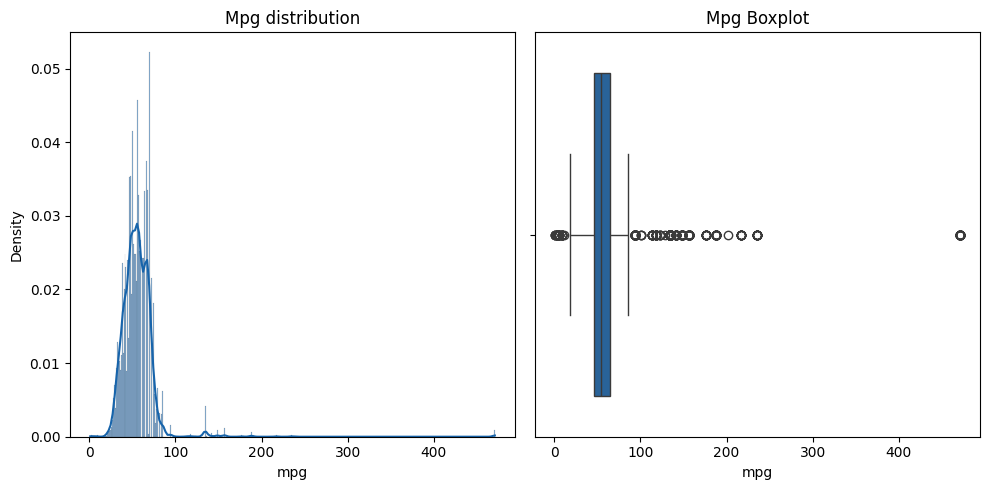

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Primo grafico: istogramma del consumo stimato
sns.histplot(dataset['mpg'], kde=True, stat='density', ax=axes[0],color=cm.Blues(0.8))
axes[0].set_title('Mpg distribution')

# Secondo grafico: boxplot del consumo stimato
sns.boxplot(x=dataset['mpg'], ax=axes[1],color=cm.Blues(0.8))
axes[1].set_title('Mpg Boxplot')

plt.tight_layout()
plt.show()

*   Miglia percorse



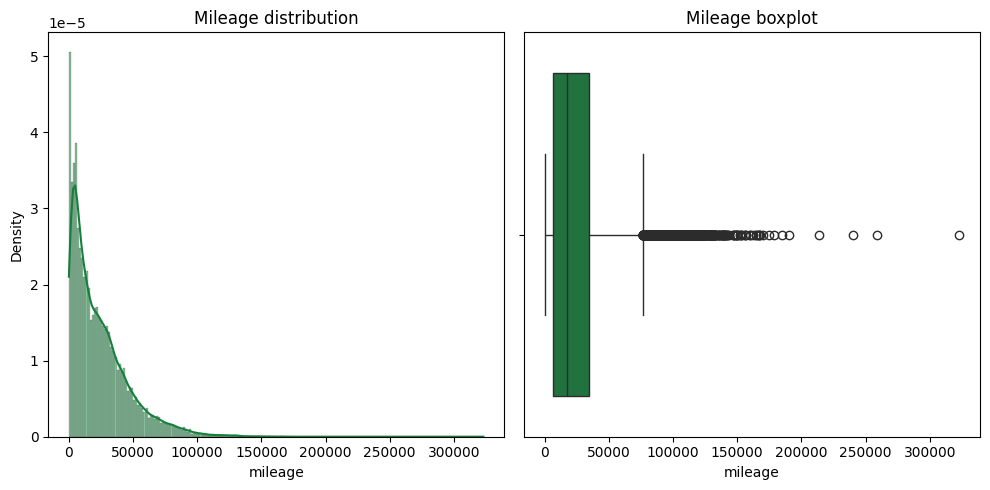

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Primo grafico: istogramma delle miglia percorse
sns.histplot(dataset['mileage'], kde=True, stat='density', ax=axes[0],color=cm.Greens(0.8))
axes[0].set_title('Mileage distribution')

# Secondo grafico: boxplot delle miglia percorse
sns.boxplot(x=dataset['mileage'], ax=axes[1],color=cm.Greens(0.8))
axes[1].set_title('Mileage boxplot')

plt.tight_layout()
plt.show()

*   Cilindrata



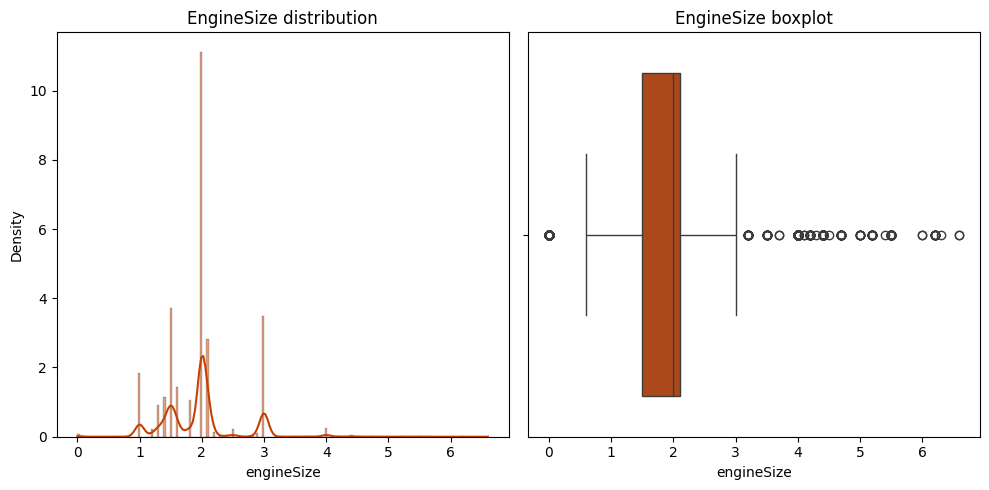

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Primo grafico: istogramma della cilindrata
sns.histplot(dataset['engineSize'], kde=True, stat='density', ax=axes[0],color=cm.Oranges(0.8))
axes[0].set_title('EngineSize distribution')

# Secondo grafico: boxplot della cilindrata
sns.boxplot(x=dataset['engineSize'], ax=axes[1],color=cm.Oranges(0.8))
axes[1].set_title('EngineSize boxplot')

plt.tight_layout()
plt.show()

*   Prezzo di vendita (target della predizione)



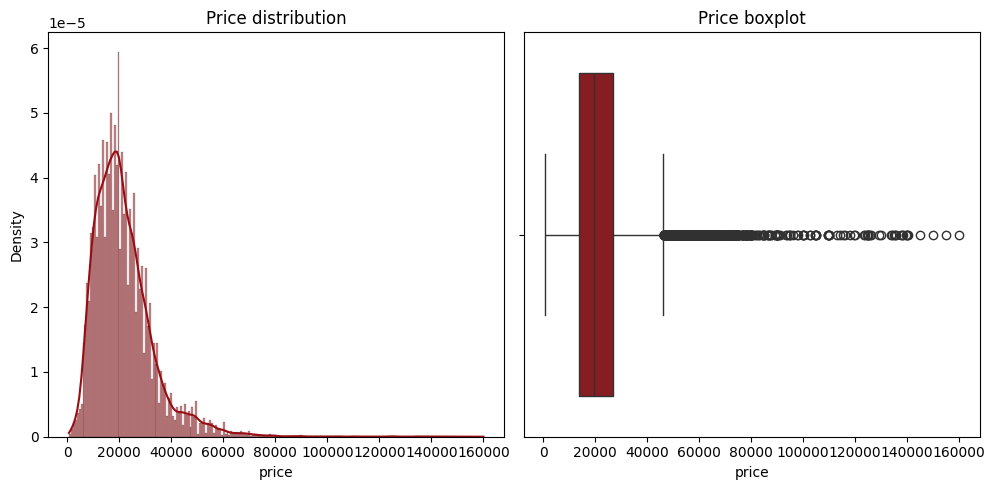

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Primo grafico: istogramma del prezzo
sns.histplot(dataset['price'], kde=True, stat='density', ax=axes[0],color=cm.Reds(0.9))
axes[0].set_title('Price distribution')

# Secondo grafico: boxplot del prezzo
sns.boxplot(x=dataset['price'], ax=axes[1],color=cm.Reds(0.9))
axes[1].set_title('Price boxplot')

plt.tight_layout()
plt.show()



Tutti i boxplot precedenti mostrano una mediana spostata rispetto al centro e code di lunghezza diversa, suggerendo una distribuzione asimmetrica dei dati per ciascuna variabile considerata. Inoltre, è evidente la presenza di valori outlier. Queste caratteristiche potrebbero compromettere l'efficacia di alcuni modelli di machine learning, soprattutto quelli che si basano sull'assunzione di una distribuzione simmetrica dei dati. Di conseguenza, diventa cruciale eseguire una pulizia del dataset.

*  Anno di produzione vs prezzo di vendita




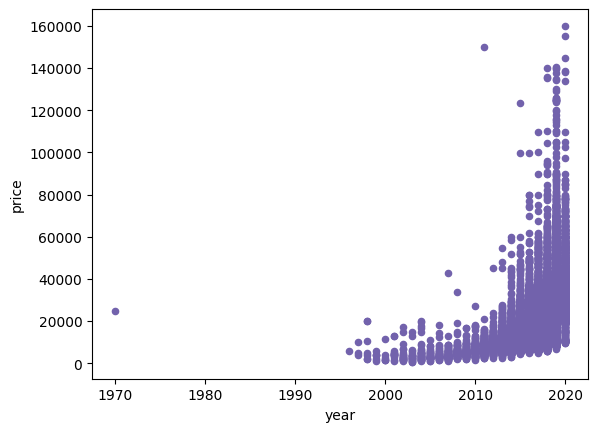

In [ ]:
# Scatter plot Year / Price
attrib = 'year'
data = pd.concat([dataset['price'], dataset[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price',color=cm.Purples(0.7));


Si osserva che i prezzi tendono ad essere più alti per le auto più recenti e viceversa. È una relazione comune, poiché le auto più recenti spesso offrono tecnologie più avanzate, prestazioni migliorate e una maggiore attrattiva per i potenziali acquirenti.



*   Miglia percorse vs Prezzo di vendita



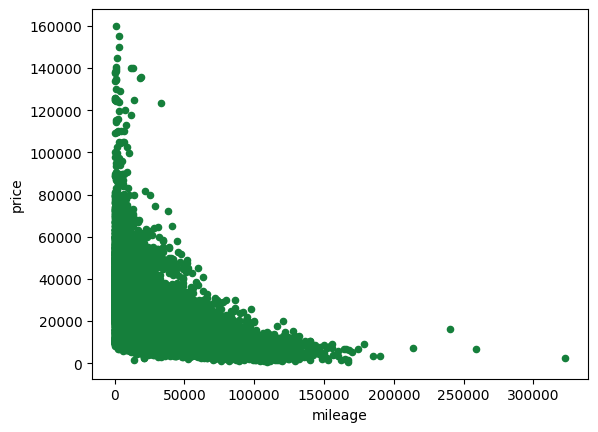

In [ ]:
# Scatter plot Mileage / Price
attrib = 'mileage'
data = pd.concat([dataset['price'], dataset[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price',color=cm.Greens(0.8));


 Si nota una relazione inversa tra il chilometraggio di un veicolo e il suo prezzo di vendita: minore è il chilometraggio, maggiore è il prezzo di vendita e viceversa.

*   Matrice di correlazione



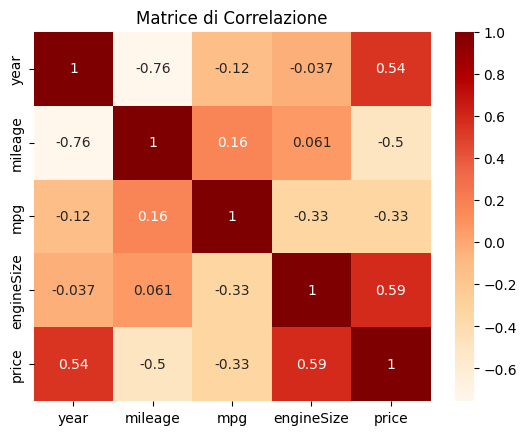

In [ ]:
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd')
plt.title('Matrice di Correlazione')
plt.show()


Come precedentemente osservato, vi è una correlazione positiva tra l'anno di produzione e il prezzo di vendita e una correlazione negativa tra le miglia percorse e il prezzo di vendita. Inoltre, si nota anche una relazione tra la cilindrata del motore e il prezzo di vendita, con entrambe le variabili che tendono ad aumentare o diminuire insieme. Questo suggerisce che la cilindrata del motore può influenzare il prezzo di vendita dell'auto, poiché le auto con motori più potenti o di maggiori dimensioni sono spesso considerate più desiderabili e possono avere un prezzo di vendita più elevato.

**Visualizzazione delle variabili categoriche**



*   Prezzo di vendita vs Casa produttrice



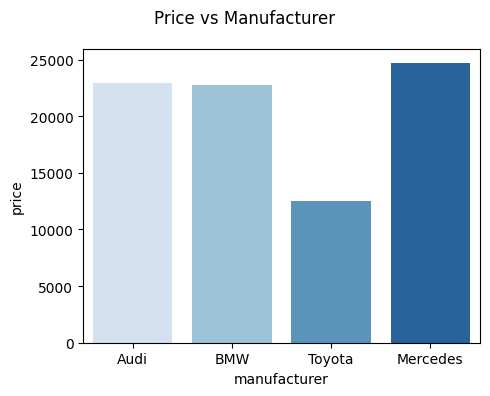

In [ ]:
attrib = 'manufacturer'
f, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=dataset, x=attrib, y='price', palette="Blues", errorbar=None, hue=attrib, ax=ax, dodge=False, legend=False)

plt.suptitle('Price vs Manufacturer')
plt.tight_layout()
plt.show()



*   Prezzo di vendita vs Cambio


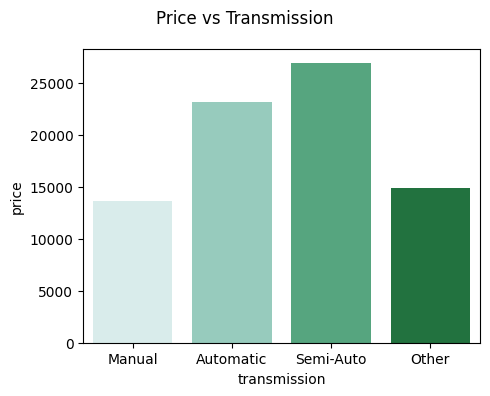

In [ ]:
attrib = 'transmission'
f, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=dataset, x=attrib, y='price', palette="BuGn", errorbar=None, hue=attrib, ax=ax, dodge=False, legend=False)

plt.suptitle('Price vs Transmission')
plt.tight_layout()
plt.show()



*   Prezzo di vendita vs Alimentazione


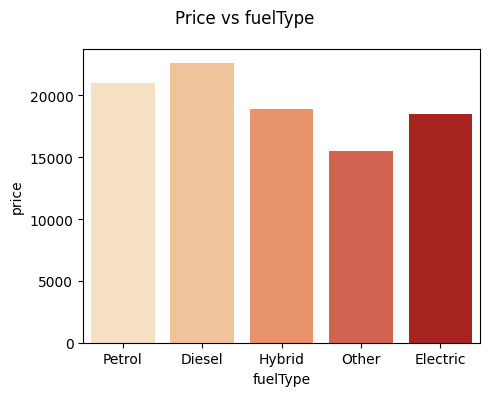

In [ ]:
attrib = 'fuelType'
f, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=dataset, x=attrib, y='price', palette="OrRd", errorbar=None, hue=attrib, ax=ax, dodge=False, legend=False)

plt.suptitle('Price vs fuelType')
plt.tight_layout()
plt.show()



*   Prezzo di vendita vs Modello



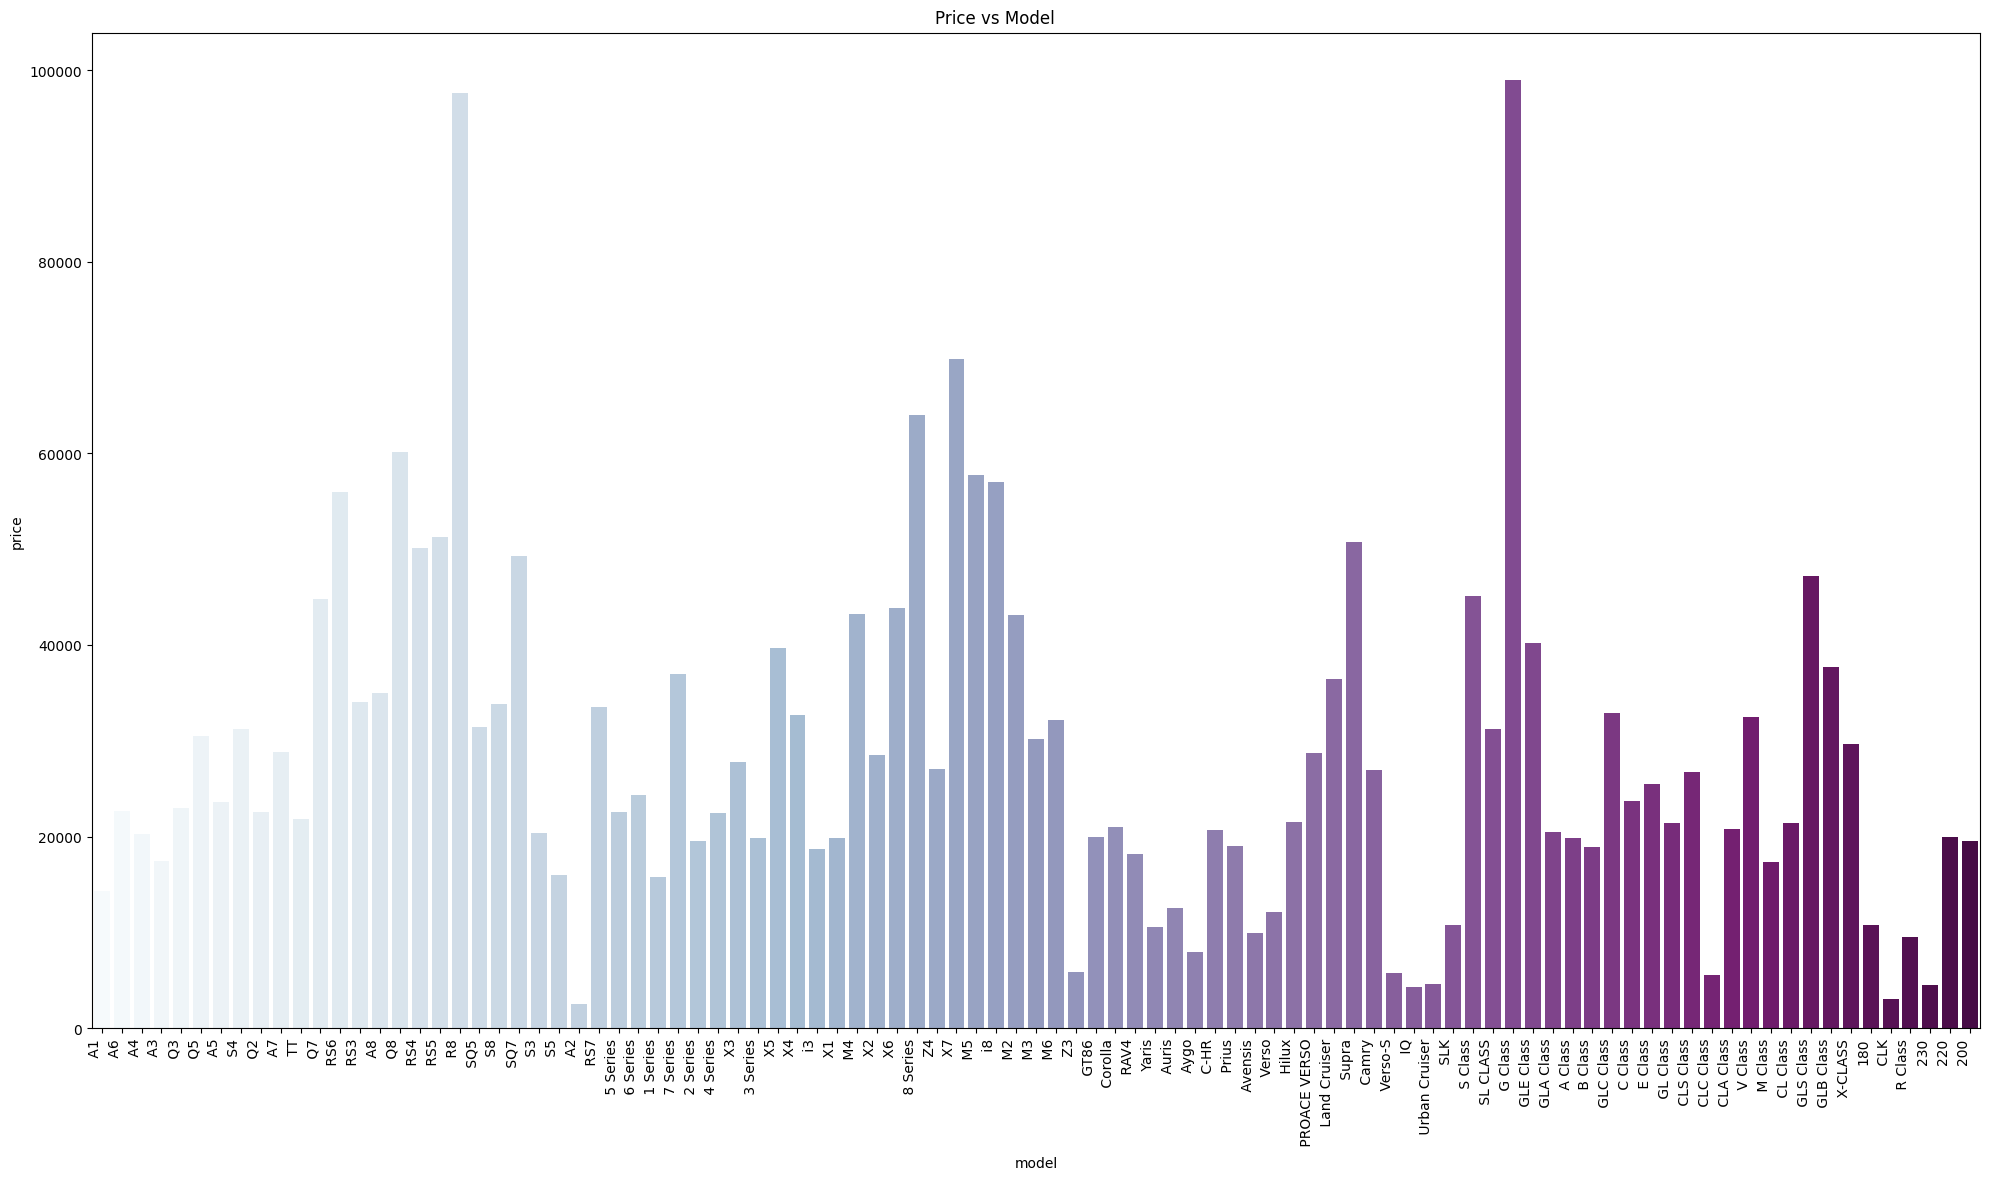

In [ ]:
attrib = 'model'
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(data=dataset, x=attrib, y='price', palette="BuPu", errorbar=None, hue=attrib, ax=ax, dodge=False, legend=False)
plt.xticks(rotation=90, ha='right')

plt.suptitle('Price vs Model')
plt.tight_layout()
plt.show()

Analizzando i grafici precedenti, che riportano la media dei prezzi in base a diverse caratteristiche categoriche, è evidente che le vetture prodotte da Mercedes, quelle con cambio semiautomatico e quelle alimentate a diesel mostrano generalmente prezzi medi più alti.


# PREPROCESSAMENTO DEI DATI



*   Valori mancanti



In [ ]:
#controllo la presenza di valori mancanti
missing_values = dataset.isna().sum()
print(missing_values)


manufacturer    0
model           0
year            0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
price           0
dtype: int64




*   Valori duplicati



In [ ]:
#controllo la presenza di duplicati
dataset=dataset.loc[~dataset.duplicated()]
dataset = dataset.reset_index(drop=True)
dataset.info()
#563 duplicati vs 41306 istanze iniziali quindi posso eliminarli. rimango con 40743

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40743 entries, 0 to 40742
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  40743 non-null  object 
 1   model         40743 non-null  object 
 2   year          40743 non-null  int64  
 3   transmission  40743 non-null  object 
 4   mileage       40743 non-null  int64  
 5   fuelType      40743 non-null  object 
 6   mpg           40743 non-null  float64
 7   engineSize    40743 non-null  float64
 8   price         40743 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 2.8+ MB




*   Outliers



In [ ]:
Q1 = dataset.quantile(0.25, numeric_only=True)
Q3 = dataset.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

year              3.0
mileage       27956.0
mpg              18.6
engineSize        0.6
price         12990.0
dtype: float64


In [ ]:
# allineo il DataFrame con la Series prima di eseguire il confronto
Q1_aligned = (Q1 - 1.5 * IQR).reindex(dataset.columns, axis=1)
Q3_aligned = (Q3 + 1.5 * IQR).reindex(dataset.columns, axis=1)

#confronto tra DataFrame e Series
dataset = dataset[~((dataset < Q1_aligned) | (dataset > Q3_aligned)).any(axis=1)]




*   Codifica delle variabili categoriche



In [ ]:
#codifico le caratteristiche categoriche come caratteristiche numeriche one-hot

dummies=pd.get_dummies(dataset[['manufacturer','model','fuelType', 'transmission']])

X = pd.concat([dataset.drop(['price', 'fuelType', 'transmission','manufacturer','model'], axis=1), dummies], axis=1)
y=dataset['price']

#X.describe()




*   Train/Test split



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)





# MODELLI DI REGRESSIONE

In [ ]:
#salverò i risultati ottenuti in queste liste per effettuare un'analisi grafica delle performance dei modelli nella sezione "Conclusioni"
models=[]
maes=[]
r2s=[]

### **Linear Regression**

La regressione lineare cerca di trovare la migliore retta (o iperpiano in casi di più dimensioni) che rappresenta la relazione tra le features e la variabile target. Applica poi l'equazione della retta o dell'iperpiano ai nuovi dati forniti per ottenere le previsioni sulla variabile target.

mae_testing: 2279.35
r2_testing: 0.87
mae_training: 2245.53
r2_training: 0.87


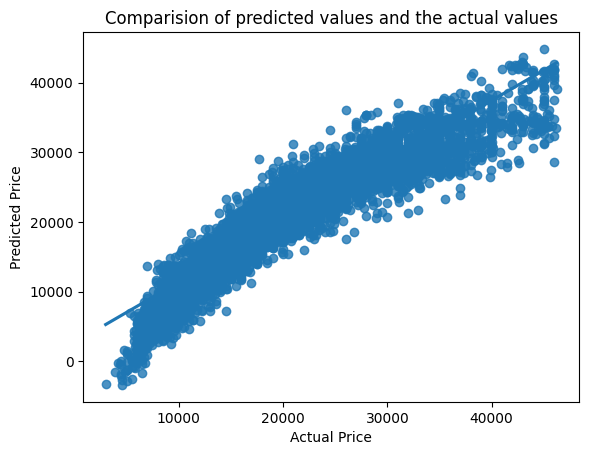

In [ ]:
#creazione del modello di regressione lineare
lr_model = LinearRegression()

#addestramento del modello sui dati di training
lr_model.fit(X_train, y_train)

#generazione delle previsioni sul set di testing
lr_y_pred = lr_model.predict(X_test)
#generazione delle previsioni sul set di training
train_y_pred = lr_model.predict(X_train)

#valutazione del modello sul set di test
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print(f'mae_testing: {lr_mae:.2f}')
print(f'r2_testing: {lr_r2:.2f}')

#valutazione del modello sul set di addestramento
maet = mean_absolute_error(y_train, train_y_pred)
r2t = r2_score(y_train, train_y_pred)
print(f'mae_training: {maet:.2f}')
print(f'r2_training: {r2t:.2f}')


#visualizzazione dei risultati
sns.regplot(x=y_test, y=lr_y_pred)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Comparision of predicted values and the actual values")
plt.show()



In [ ]:
models.append('LinearRegression')
maes.append(lr_mae)
r2s.append(lr_r2)

### **KNeighborsRegressor**

K-nearest neighbors fa affidamento sulla vicinanza dei dati nello spazio delle feature per fare previsioni.

In [ ]:
#Eseguo una ricerca casuale dei migliori parametri per il modello

knn = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 21)}  # Esplora valori di k da 1 a 20

random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1)

random_search.fit(X_train_scaled, y_train)

# Visualizza i migliori parametri trovati
print("Best hyperparameters:", random_search.best_params_)



Best hyperparameters: {'n_neighbors': 4}


mae_training: 1076.78
r2_training: 0.96
mae_testing: 1429.54
r2_testing: 0.94


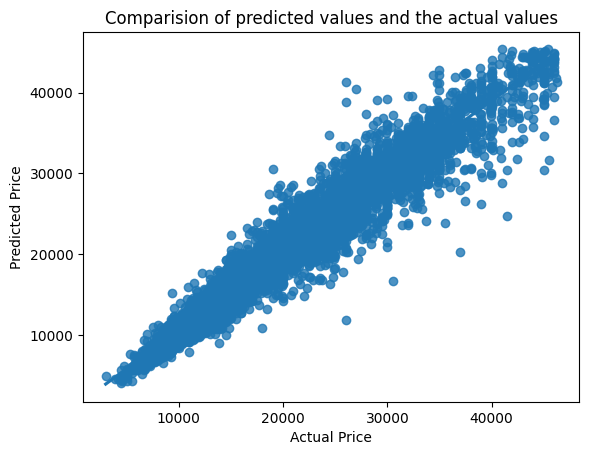

In [ ]:
#creazione del modello con i migliori parametri trovati precedentemente
knn_model = KNeighborsRegressor(n_neighbors = 4)

#addestramento
knn_model.fit(X_train_scaled, y_train)

#generazione delle previsioni sul set di test
y_predict = knn_model.predict(X_test_scaled)
#generazione delle previsioni sul set di test
train_y_pred = knn_model.predict(X_train_scaled)

#valutazione del modello sul set di addestramento
maet = mean_absolute_error(y_train, train_y_pred)
r2t = r2_score(y_train, train_y_pred)
print(f'mae_training: {maet:.2f}')
print(f'r2_training: {r2t:.2f}')

#valutazione del modello sul set di test
knn_mae = mean_absolute_error(y_test, y_predict)
knn_r2 = r2_score(y_test, y_predict)
print(f'mae_testing: {knn_mae:.2f}')
print(f'r2_testing: {knn_r2:.2f}')


#visualizzazione dei risultati
sns.regplot(x=y_test, y=y_predict)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Comparision of predicted values and the actual values")
plt.show()

In [ ]:
models.append('KNeighborsRegressor')
maes.append(knn_mae)
r2s.append(knn_r2)

### **Random forest**

Il Random Forest Regressor è un modello di regressione che sfrutta una collezione di alberi decisionali addestrati in modo parallelo per fare previsioni più accurate sui dati.

In [ ]:
rf = RandomForestRegressor()

parameters = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=parameters,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'n_estimators': 250, 'min_samples_split': 7, 'min_samples_leaf': 1}


mae_training: 766.02
r2_training: 0.98
mae_testing: 1286.69
r2_testing: 0.95


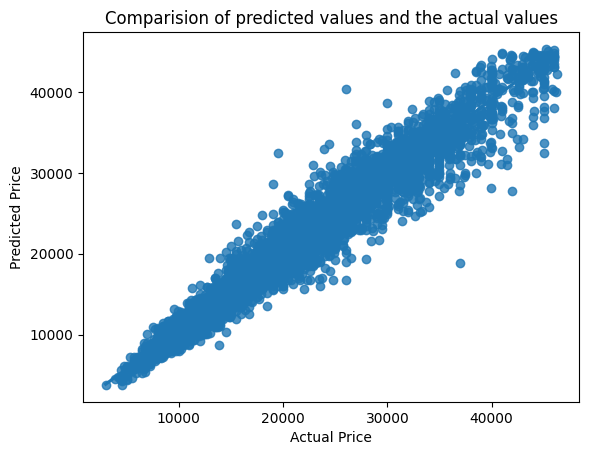

In [ ]:
#creazione del modello
rf_model = RandomForestRegressor(n_estimators=250, min_samples_split=7, min_samples_leaf=1, random_state=42)

#addestramento del modello
rf_model.fit(X_train_scaled, y_train)

#generazione delle previsioni
rf_y_pred = rf_model.predict(X_test_scaled)
train_y_pred = rf_model.predict(X_train_scaled)

#valutazione del modello sul set di addestramento
maet = mean_absolute_error(y_train, train_y_pred)
r2t = r2_score(y_train, train_y_pred)
print(f'mae_training: {maet:.2f}')
print(f'r2_training: {r2t:.2f}')

#valutazione del modello sul set di test
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f'mae_testing: {rf_mae:.2f}')
print(f'r2_testing: {rf_r2:.2f}')

#visualizzazione dei risultati
sns.regplot(x=y_test, y=rf_y_pred)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Comparision of predicted values and the actual values")
plt.show()

In [ ]:
models.append('RandomForestRegressor')
maes.append(rf_mae)
r2s.append(rf_r2)

### **GradientBoostingRegressor**

Il Gradient Boosting Regressor costruisce un modello di regressione combinando una serie di alberi decisionali in modo sequenziale. Durante ogni iterazione, il modello addestra un nuovo albero decisionale per correggere gli errori residui del modello precedente

In [ ]:
gb= GradientBoostingRegressor()

param = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.001, 0.01, 0.1],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

random_search = RandomizedSearchCV(
    gb,
    param_distributions=param,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 3, 'learning_rate': 0.1}


mae_training: 1575.99
r2_training: 0.93
mae_testing: 1640.87
r2_testing: 0.93


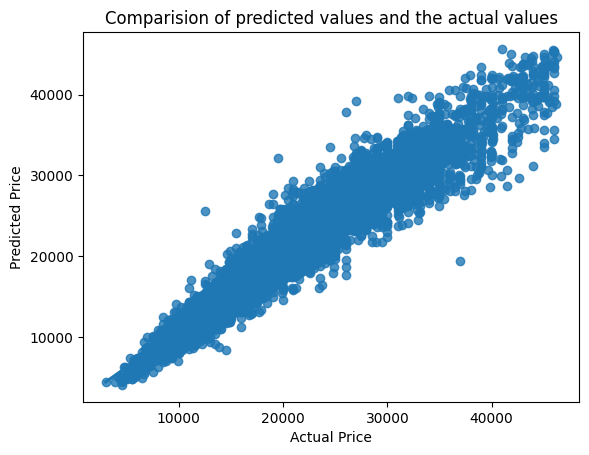

In [ ]:
#creazione del modello
gb_model = GradientBoostingRegressor(n_estimators=300, min_samples_split=3, min_samples_leaf= 3, learning_rate=0.1, random_state=42)
#addestramento del modello
gb_model.fit(X_train_scaled, y_train)

#generazione delle previsioni
gb_y_pred = gb_model.predict(X_test_scaled)
train_y_pred = gb_model.predict(X_train_scaled)

#valutazione del modello sul set di addestramento
maet = mean_absolute_error(y_train, train_y_pred)
r2t = r2_score(y_train, train_y_pred)
print(f'mae_training: {maet:.2f}')
print(f'r2_training: {r2t:.2f}')

#valutazione del modello sul set di test
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print(f'mae_testing: {gb_mae:.2f}')
print(f'r2_testing: {gb_r2:.2f}')

#visualizzazione dei risultati
sns.regplot(x=y_test, y=gb_y_pred)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Comparision of predicted values and the actual values")
plt.show()

In [ ]:
models.append('GradientBoostingRegressor')
maes.append(gb_mae)
r2s.append(gb_r2)

### **VotingRegressor**

Il Voting Regressor combina diversi modelli di regressione in un unico modello e restituisce la media dei valori predetti da ciascun modello.

mae_training: 1097.66
r2_training: 0.97
mae_testing: 1368.16
r2_testing: 0.95


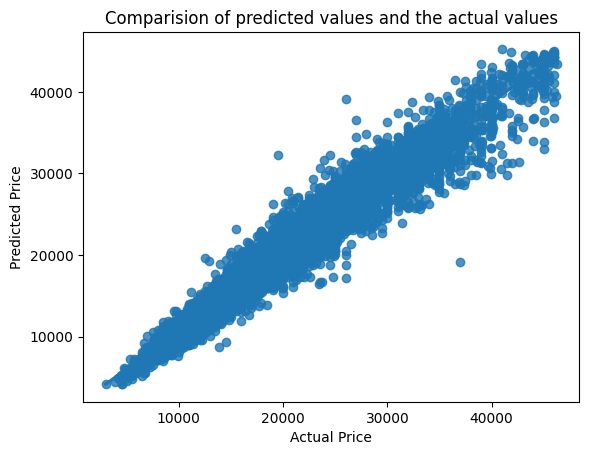

In [ ]:
#creazione del modello
vr_model = VotingRegressor(estimators=[('gb', gb_model), ('rf', rf_model)])
#addestramento del modello
vr_model.fit(X_train_scaled, y_train)

#generazione delle previsioni
vr_y_pred = vr_model.predict(X_test_scaled)
train_y_pred = vr_model.predict(X_train_scaled)

#valutazione del modello sul set di addestramento
maet = mean_absolute_error(y_train, train_y_pred)
r2t = r2_score(y_train, train_y_pred)
print(f'mae_training: {maet:.2f}')
print(f'r2_training: {r2t:.2f}')

#valutazione del modello sul set di test
vr_mae = mean_absolute_error(y_test, vr_y_pred)
vr_r2 = r2_score(y_test, vr_y_pred)
print(f'mae_testing: {vr_mae:.2f}')
print(f'r2_testing: {vr_r2:.2f}')

#visualizzazione dei risultati
sns.regplot(x=y_test, y=vr_y_pred)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Comparision of predicted values and the actual values")
plt.show()

In [ ]:
models.append('VotingRegressor')
maes.append(vr_mae)
r2s.append(vr_r2)

### **Neural Network**

In [ ]:
def model_builder(hp):
    nn = keras.Sequential()

    # Tune the number of units
    nn.add(
        Dense(units=112,
              input_dim = X_train.shape[1],
              activation='relu',
              kernel_initializer=hp.Choice('initializer', values=['glorot_normal', 'random_normal', 'glorot_uniform', 'he_normal'])
              )
        )

    for i in range(hp.Int('num_layers', 1, 10)):
        nn.add(
            Dense(units=hp.Int(f'layer_{i}_units', min_value=8, max_value=100, step=16),
                  activation='relu',
                  kernel_initializer=hp.Choice('initializer', values=['glorot_normal', 'random_normal', 'glorot_uniform', 'he_normal'])
                  )
            )

    nn.add(
        Dense(units=1,
                 kernel_initializer=hp.Choice('initializer', values=['glorot_normal', 'random_normal', 'glorot_uniform', 'he_normal']),
                 activation='linear')
        )

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    nn.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error'])
    return nn


In [ ]:
tuner = kt.Hyperband(model_builder,
                     overwrite=True,
                     max_epochs=100,
                     objective='val_mean_absolute_error',
                     directory='my_dir',
                     project_name='my_project'
                     )
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=5)

tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

units = []
for i in range(0, best_hps.get("num_layers")):
  units.append(best_hps.get(f"layer_{i}_units"))

print(f"""
The hyperparameter search is complete.
* the optimal number of layers is {best_hps.get("num_layers")};
* the optimal number of units in each layer is: {' '.join(str(unit) for unit in units)};
* the optimal learning rate is {best_hps.get("learning_rate")}.
""")

Trial 254 Complete [00h 00m 37s]
val_mean_absolute_error: 1580.81689453125

Best val_mean_absolute_error So Far: 1381.90869140625
Total elapsed time: 01h 40m 31s

The hyperparameter search is complete.
* the optimal number of layers is 8;
* the optimal number of units in each layer is: 40 8 8 40 40 8 40 8;
* the optimal learning rate is 0.001.



Epoch 1/50
915/915 [==============================] - 8s 4ms/step - loss: 3590.9624 - mean_absolute_error: 3590.9624 - val_loss: 1836.1383 - val_mean_absolute_error: 1836.1383
Epoch 2/50
915/915 [==============================] - 3s 3ms/step - loss: 1765.8893 - mean_absolute_error: 1765.8893 - val_loss: 1739.7623 - val_mean_absolute_error: 1739.7623
Epoch 3/50
915/915 [==============================] - 4s 4ms/step - loss: 1679.4148 - mean_absolute_error: 1679.4148 - val_loss: 1697.8628 - val_mean_absolute_error: 1697.8628
Epoch 4/50
915/915 [==============================] - 4s 4ms/step - loss: 1650.0065 - mean_absolute_error: 1650.0065 - val_loss: 1682.3643 - val_mean_absolute_error: 1682.3643
Epoch 5/50
915/915 [==============================] - 3s 4ms/step - loss: 1621.8207 - mean_absolute_error: 1621.8207 - val_loss: 1616.7469 - val_mean_absolute_error: 1616.7469
Epoch 6/50
915/915 [==============================] - 3s 3ms/step - loss: 1600.8895 - mean_absolute_error: 1600.8895 - v

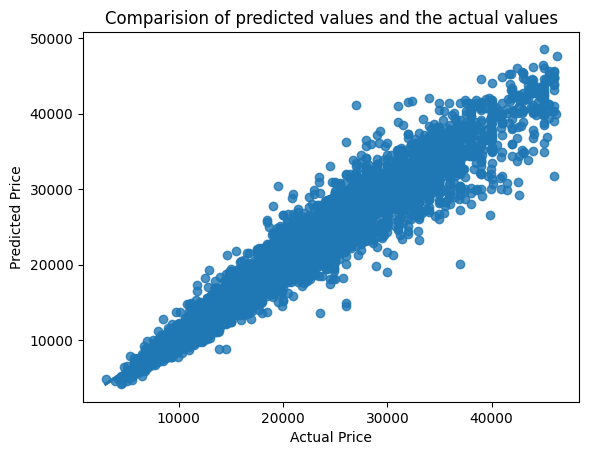

In [ ]:
from sklearn.metrics import mean_absolute_error

#creo il modello utilizzando gli iperparametri ottimizzati
nn_model = tuner.hypermodel.build(best_hps)
nn_model.fit(X_train_scaled, y_train, epochs=50,callbacks = [early_stopping], validation_data=(X_test_scaled,y_test)) #verbose=0)

#generazione delle previsioni
nn_y_pred = nn_model.predict(X_test_scaled)
train_y_pred = nn_model.predict(X_train_scaled)

#valutazione del modello sul set di addestramento
maet = mean_absolute_error(y_train, train_y_pred)
r2t = r2_score(y_train, train_y_pred)
print(f'mae_training: {maet:.2f}')
print(f'r2_training: {r2t:.2f}')

#valutazione del modello sul set di test
nn_mae = mean_absolute_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
print(f'mae_testing: {nn_mae:.2f}')
print(f'r2_testing: {nn_r2:.2f}')

#visualizzazione dei risultati
sns.regplot(x=y_test, y=nn_y_pred)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Comparision of predicted values and the actual values")
plt.show()

In [ ]:
models.append('NeuralNetwork')
maes.append(nn_mae)
r2s.append(nn_r2)

# CONCLUSIONI

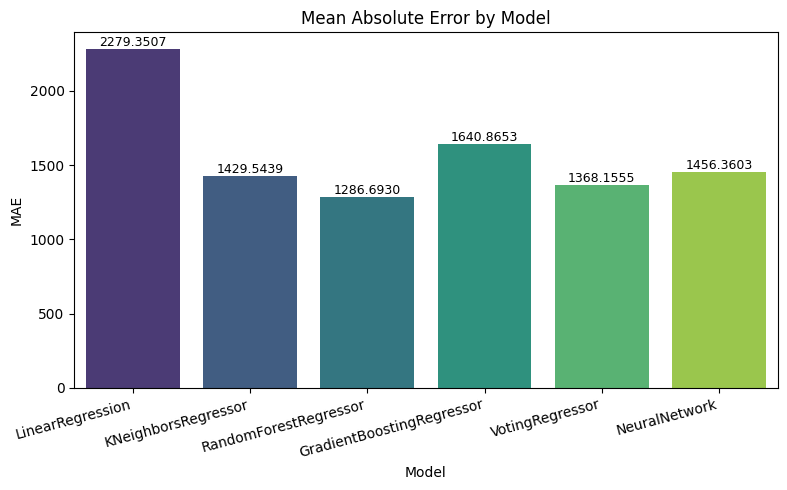

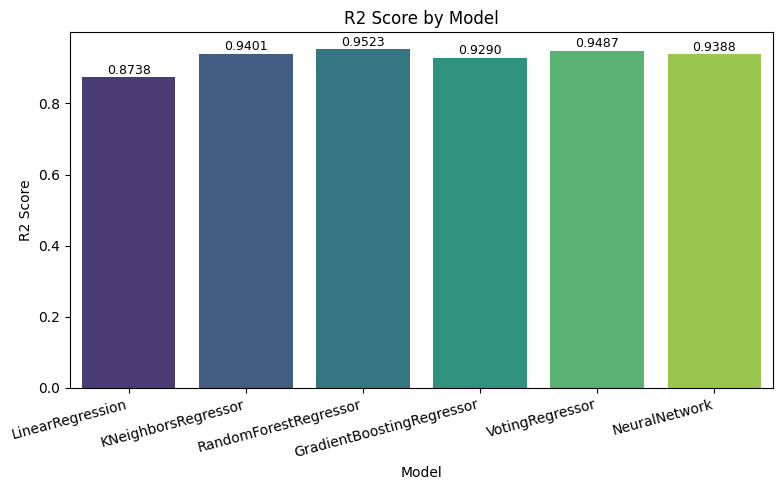

In [ ]:
df_mae = pd.DataFrame({'Model': models, 'MAE': maes})
df_r2 = pd.DataFrame({'Model': models, 'R2 Score': r2s})

# Plot MAE
plt.figure(figsize=(8, 5))
ax1 = sns.barplot(x='Model', y='MAE', data=df_mae, hue='Model', palette='viridis')
plt.xticks(rotation=15, ha='right')
plt.ylabel('MAE')
plt.title('Mean Absolute Error by Model')

#aggiungo annotazioni sui grafici relativi alla MAE
for bar, value in zip(ax1.patches, maes):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.4f}',
             ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

# Plot R2 Score
plt.figure(figsize=(8, 5))
ax2 = sns.barplot(x='Model', y='R2 Score', data=df_r2, hue='Model', palette='viridis')
plt.xticks(rotation=15, ha='right')
plt.ylabel('R2 Score')
plt.title('R2 Score by Model')

#aggiungo notazioni sui grafici relativi alla r2score
for bar, value in zip(ax2.patches, r2s):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.4f}',
             ha='center', color='black', fontsize=9)

plt.tight_layout()
plt.show()

Dalle analisi condotte, emergono prestazioni superiori utilizzando il modello Random Forest rispetto agli altri modelli considerati.